#### Mask detector
Use the darketnet YOLO written in C due its to very high performance relative to other YOLOs which makes it really easy as the whole process then becomes only a few commands long. The purpose of this part is to give you a hands on experience on YOLO which will help you in your upcoming project

Online Resource:
https://medium.com/@manivannan_data/how-to-train-yolov3-to-detect-custom-objects-ccbcafeb13d2


#### Dataset
- At least 50 images of people wearing masks
- At least 50 images of people not wearing masks

Dataset with two classes: "mask" and "no_mask".Now you will have to annotate the masks from the mask's set using the following resources:

Annotation Resource:
https://medium.com/@manivannan_data/yolo-annotation-tool-new-18c7847a2186

Github Link For The Tool:
https://github.com/ManivannanMurugavel/Yolo-Annotation-Tool-New-



In [ ]:
# making all the necessary imports here
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import glob
import os

# you may include more libraries here if needed

#### Getting YOLO Ready


In [ ]:
!git clone https://github.com/umamanasir/darknet
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=1/LIBSO=1/' Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5959, done.
remote: Total 5959 (delta 0), reused 0 (delta 0), pack-reused 5959
Receiving objects: 100% (5959/5959), 6.37 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (3934/3934), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:1004:57: note: declared here
 exter

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74 #downloading pre trained weights


In [ ]:
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/CV_PA1/DataSet.zip' -d '/content/darknet/'

Mounted at /content/drive
Archive:  /content/drive/MyDrive/CV_PA1/DataSet.zip
  inflating: /content/darknet/DataSet/classes.txt  
   creating: /content/darknet/DataSet/Images/
  inflating: /content/darknet/DataSet/Images/img1 (2).png  
  inflating: /content/darknet/DataSet/Images/img1 (2).txt  
  inflating: /content/darknet/DataSet/Images/img1 (3).png  
  inflating: /content/darknet/DataSet/Images/img1 (3).txt  
  inflating: /content/darknet/DataSet/Images/img1.png  
  inflating: /content/darknet/DataSet/Images/img1.txt  
  inflating: /content/darknet/DataSet/Images/img10 (2).png  
 extracting: /content/darknet/DataSet/Images/img10 (2).txt  
  inflating: /content/darknet/DataSet/Images/img10 (3).png  
  inflating: /content/darknet/DataSet/Images/img10 (3).txt  
  inflating: /content/darknet/DataSet/Images/img10.png  
  inflating: /content/darknet/DataSet/Images/img10.txt  
  inflating: /content/darknet/DataSet/Images/img11 (2).png  
 extracting: /content/darknet/DataSet/Images/img11 (2

In [ ]:
os.chdir('/content/darknet')
!pwd

/content/darknet


#### Editing Config Files Here

You will have to refer to the medium article shared initially to be able to do this part 

<b>Note:</b>The line numbers in the article are not the same but are in the same order

In [ ]:
%%writefile cfg/mask-yolov3.cfg

### Edit Here ### 

[net]
# Testing
# batch=24
# subdivisions=8
Training
batch=64
subdivisions=32
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 4000
policy=steps
steps=3200,3600
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filters=1024
size=3
stride=1
pad=1
activation=leaky

###########

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=21
activation=linear

[yolo]
mask = 3,4,5
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes=2
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

[route]
layers = -4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = -1, 8

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=21
activation=linear

[yolo]
mask = 0,1,2
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes=2
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

#################

Writing cfg/mask-yolov3.cfg


In [ ]:
!unzip '/content/drive/MyDrive/CV_PA1/weights.zip' -d '/content/darknet/'

Archive:  /content/drive/MyDrive/CV_PA1/weights.zip
  inflating: /content/darknet/weights/mask-yolov3_10000.weights  
  inflating: /content/darknet/weights/mask-yolov3_best.weights  
  inflating: /content/darknet/weights/sc3mp.mp4  


In [ ]:
%%writefile cfg/mask-obj.data

### Edit Here ###

classes= 2
train  = DataSet/train.txt 
valid  = DataSet/test.txt
names = cfg/mask-obj.names  
backup = backup/

Writing cfg/mask-obj.data


In [ ]:
%%writefile cfg/mask-obj.names

### Edit Here ###

mask
no_mask


#################

Writing cfg/mask-obj.names


In [ ]:
# os.chdir('/content/darknet/DataSet')

# !python process.py -a Labels
# !pwd
os.chdir('/content/darknet')
!pwd


/content/darknet


In [ ]:
!./darknet detector train cfg/mask-obj.data cfg/mask-yolov3.cfg weights/mask-yolov3_best.weights

#### Testing Some Images



layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

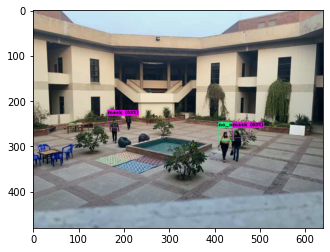

In [47]:
!./darknet detector test cfg/mask-obj.data cfg/mask-yolov3.cfg backup/mask-yolov3_best.weights data/fileTest.jpg

# !./darknet detector demo cfg/mask-obj.data cfg/mask-yolov3.cfg weights/mask-yolov3_10000.weights sc3mp.mp4 -i 0 -out-filename stream3.avi -dont_show # test a video

image = cv2.imread("predictions.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#################